# Random forests

* How to actually use random forests in sklearn
* How to evaluate their predictive ability using a train/test split of the original data
* Computing feature importance scores

Goal: To classify which groups/categories data belong to

"Random forests is a supervised learning algorithm. It can be used both for classification and regression. It is also the most flexible and easy to use algorithm. A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.

Random forests has a variety of applications, such as recommendation engines, image classification and feature selection. It can be used to classify loyal loan applicants, identify fraudulent activity and predict diseases."(https://www.datacamp.com/tutorial/random-forests-classifier-python)

More information:
* https://towardsdatascience.com/understanding-random-forest-58381e0602d2

What are decision trees?

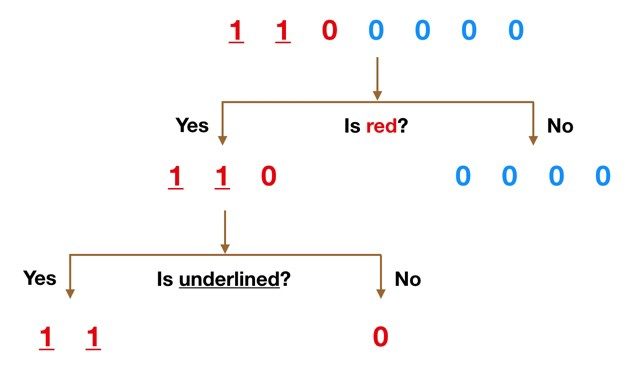

In [2]:
%matplotlib inline
from IPython.display import Image
Image('image_1.jpeg')

In a random forest, we have many decision trees working ensemble

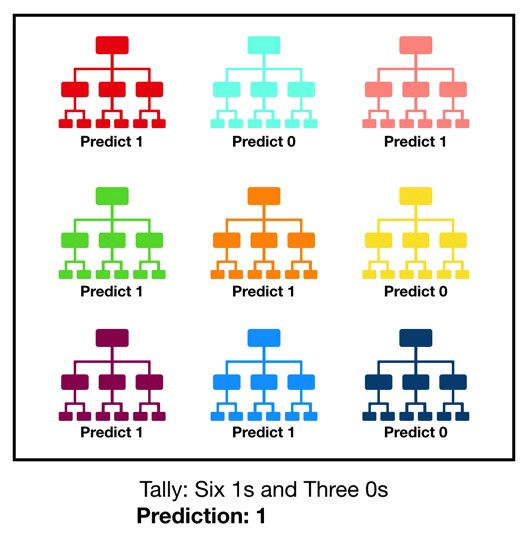

In [3]:
%matplotlib inline
from IPython.display import Image
Image('image_2.jpeg')

Under what conditions is a random forest model likely to succeed?
* There are needs to be some actual signal in our data's variables
* The predictions made by the individual trees are not highly correlated

Example using the iris flower dataset

Import packages

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

Load dataset

In [5]:
iris = datasets.load_iris()
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


Move to dataframe

In [6]:
iris_df=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})

Split data into indendent and depend variables

In [7]:
X_data = iris_df[['sepal length', 
                  'sepal width', 
                  'petal length', 
                  'petal width']]  

Y_data = iris_df['species']  

Split data into test and training sets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_data, 
                                                    Y_data, 
                                                    test_size=0.3)


Fit the model using training data

In [15]:
clf=RandomForestClassifier(n_estimators=10)

clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

Test the model using our test set

In [16]:
y_pred=clf.predict(X_test)

How accurate is the model?

In [17]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9333333333333333


We can also test the model on a particular set of values

In [12]:
clf.predict([[3, 5, 4, 2]])

array([2])

Which feature was most important?

Text(0.5, 1.0, 'Visualizing Important Features')

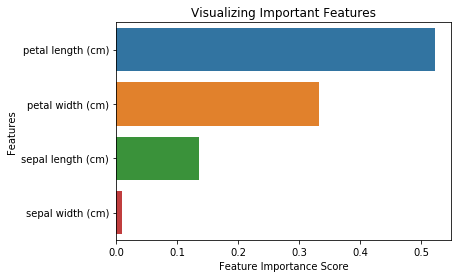

In [13]:
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

What happens if we make the training set larger?

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_data, 
                                                    Y_data, 
                                                    test_size=0.1)

clf=RandomForestClassifier(n_estimators=10)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8666666666666667


Challenge: Try rerunning the model without the least important feature